# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Kamsy | Nnodu | Kamsy Nnodu,2024/11/29 | 4 | 25% |
| Member 2: | Saba | Shabnam | Saba Shabnam, 2024/11/20 | 4 | 25% |
| Member 3: | Christopher | Roberts | Christopher Roberts,2024/11/29 | 4 | 25% |
| Member 4: | Sarah | Jasim | Sarah Jasim,2024/11/29 | 5 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# some library imports
import pandas as pd

First load the following datasets into dataframes. 
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning. 
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset. 
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [2]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set =pd.read_csv('./UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 =pd.read_csv('./UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 =pd.read_csv('./2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples). 

In [3]:
# TODO: Display first two rows of cv_set 
# (1 mark)
cv_set.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [4]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [5]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
cv_rows, cv_cols = cv_set.shape
test1_rows, test1_cols = test_set1.shape
test2_rows, test2_cols = test_set2.shape

# Printing the results
print(f"'cv_set' has {cv_rows} rows and {cv_cols} columns")
print(f"'test_set1' has {test1_rows} rows and {test1_cols} columns")
print(f"'test_set2' has {test2_rows} rows and {test2_cols} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [6]:
# TODO: Display all columns in cv_set 
# (1 mark)
cv_set.columns.tolist()

['ax_sum',
 'ay_sum',
 'az_sum',
 'gx_sum',
 'gy_sum',
 'gz_sum',
 'a_sum',
 'g_sum',
 'ax_var',
 'ay_var',
 'az_var',
 'gx_var',
 'gy_var',
 'gz_var',
 'a_var',
 'g_var',
 'ax_min',
 'ay_min',
 'az_min',
 'gx_min',
 'gy_min',
 'gz_min',
 'a_min',
 'g_min',
 'ax_max',
 'ay_max',
 'az_max',
 'gx_max',
 'gy_max',
 'gz_max',
 'a_max',
 'g_max',
 'motion_state']

In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features. 

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y* 

In [7]:
# TODO - Load target vector into y
# (1 mark) 
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [8]:
# TODO - Load all features from cv_set to X
# (2 marks)
X=cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [10]:
# TODO - Perform test/train split 
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively. 

In [11]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])
# Confirm the pipeline structure
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options. 

In [12]:
# TODO - Setup grid set 
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Displaying the parameter grid
param_grid

{'scaler': [StandardScaler(), RobustScaler(), None],
 'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__gamma': [0.001, 0.01, 0.1, 1],
 'classifier__kernel': ['rbf']}

In [13]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [14]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best parameter set:\n{}\n".format(grid.best_params_))

# Best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))

# Best cross-validation test score
print("Best cross-validation test score: {:.2f}".format(grid.best_score_))

# Test set accuracy score
test_set_accuracy = grid.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_set_accuracy))

Best parameter set:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation test score: 0.95
Test set accuracy: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

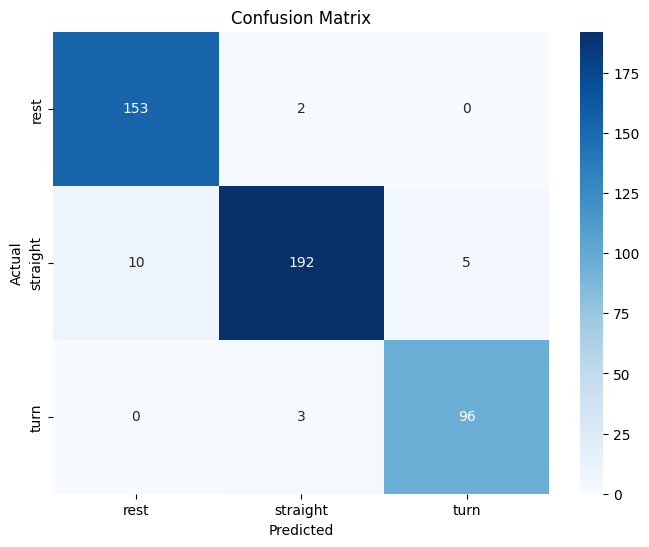

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [16]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)

# Predicting on the test set
y_pred = grid.predict(X_test)  
# Computing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Printing the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model shows a strong fit with the dataset with an overall accuracy of 95% and demonstrates high precision, recall and F1-scores for all classes. The confusion matrix suggests few misclassifications, with a slight tendency to confuse straight and turn. The turn class has a slightly lower recall (0.91), likely due to its smaller sample size(99 instances). The weighted and macro averages of precision, recall, and F1-scores (~0.95) further confirm balanced performance across all classes.  Overall, the model yields satisfactory results, however, addressing the class imbalance could further improve results.

2.  Intervals of C ([0.01 0.1 1 10 100]) and gamma ([0.001 0.01 0.1 1]) are appropriate as they explore a wide range of hyperparameter values logarithmically, which is a standard practice. The range for C balances regularization strength, with smaller values encouraging simpler models and larger values reducing training error. For gamma, the range spans smooth decision boundaries (small values) to more localized ones (larger values). In case, the optimal values are pegged on either end of the range, for example, C = 100 or gamma = 0.001, it suggests that the range could be made wider. More refined grid or larger intervals, for instance, C=1000 or gamma that is greater than 1, would be appropriate for more intricate data. Overall, the intervals are suitable as a starting point but may require adjustments after 

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [17]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [18]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])

X2.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [19]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
test_set1_score = grid.score(X1, y1)
test_set2_score = grid.score(X2, y2)

# Printing the test set accuracy scores
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

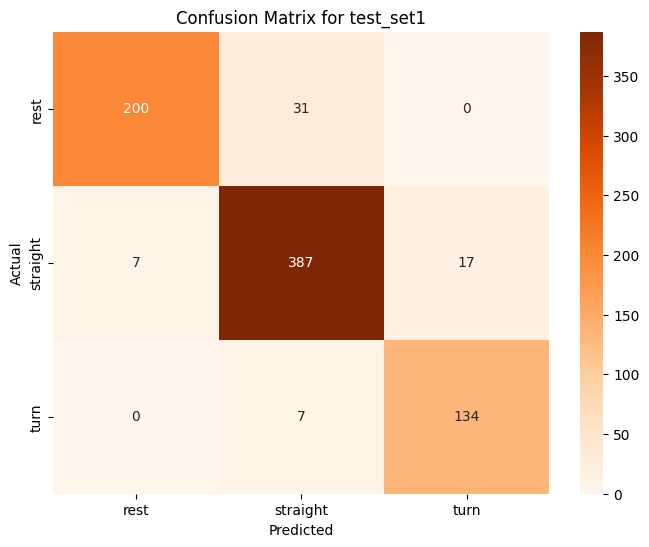

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [20]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
y1_pred = grid.predict(X1)

# Computing the confusion matrix for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=grid.classes_, 
            yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Printing the classification report
print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

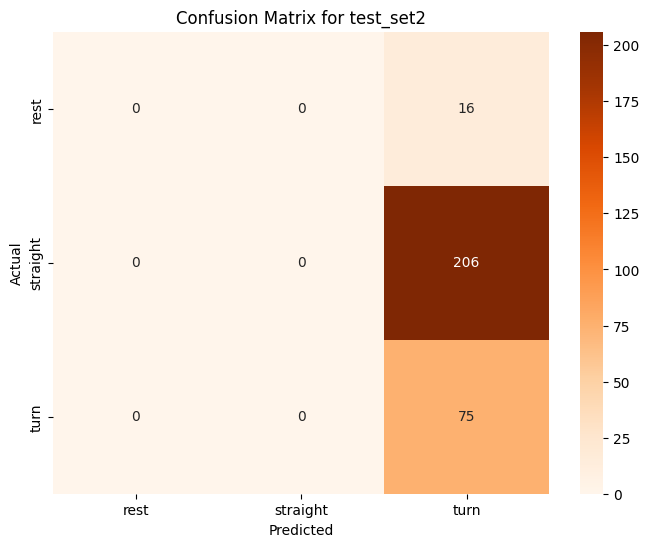

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



c:\Users\Saba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [21]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Predicting on test_set2
y2_pred = grid.predict(X2)

# Computing the confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=grid.classes_, 
            yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Printing the classification report
print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred))

___

#### 1.3.3 - Questions 

**Based on results so far** 
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The model's performance on (X_test, y_test) is higher because this test set originates from the same distribution as the training data, ensuring consistency in features and labels.
However, on (X1, y1) and (X2, y2), which are independent datasets, there is a significant drop in performance. This indicates that the model is not generalizing well beyond the specific characteristics of the training set.
This performance gap could be an example of domain shift or covariate shift, where the statistical properties of the training data differ from those of the independent datasets. It highlights the importance of training the model on diverse and representative datasets to improve generalization. 

2. The observed behavior is likely due to several factors. One key reason is domain shift, where the training and test data differ because of variations in sensors, environments, or conditions during data collection. 
Another reason could be overfitting, where the model learns specific patterns in the training data that do not apply to new datasets. Additionally, if the training data is not diverse enough or some classes are underrepresented, the model may struggle with new or unseen scenarios.
Finally, inconsistent data preprocessing, such as differences in feature scaling between datasets, can also lead to poor performance. To address these issues, it is important to use diverse and representative training data, ensure consistent preprocessing across all datasets, and apply techniques like domain adaptation to help the model generalize better to new conditions.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [22]:
# TODO - Load selected features from cv_set to X
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
X.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [23]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [24]:
# TODO - Perform model training and tuning using `GridSearchCV`

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define parameter grid
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Perform grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [25]:
# TODO: Print the results from the grid search

print("Best parameter set:\n{}\n".format(grid.best_params_))

# Best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))

# Best cross-validation test score
print("Best cross-validation test score: {:.2f}".format(grid.best_score_))

# Test set accuracy score
test_set_accuracy = grid.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_set_accuracy))


Best parameter set:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.97
Best cross-validation test score: 0.82
Test set accuracy: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

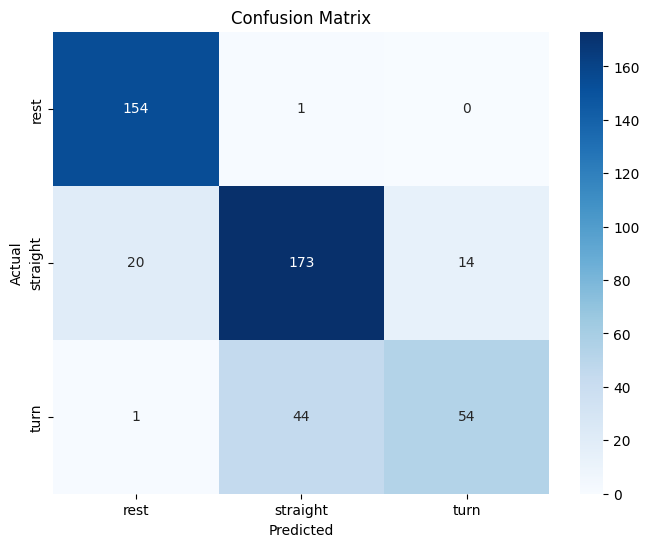

Classification Report:

              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [26]:
# TODO - Display confusion matrix and print classification reports
# (2 marks)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Predicting on the test set
y_pred = grid.predict(X_test)  
# Computing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Printing the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer 
1. The model in section 1 (using all features) might seem overfitted as it performs significantly better on the training/cross-validation set compared to the test set. The model in section 2 (using selected features) shows a more balanced performance, suggesting it might be a better fit. However, a more detailed analysis, including feature importance and potential overfitting in both models, is needed to make a definitive conclusion.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [27]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [28]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [29]:
# TODO - Print test score accuracies for test_set1 and test_set2
test_set1_score = grid.score(X1, y1)
test_set2_score = grid.score(X2, y2)
# Printing the test set accuracy scores
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

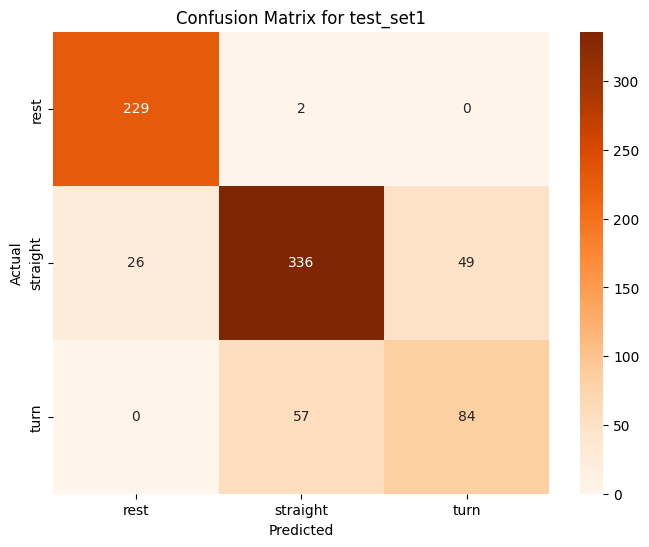

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [30]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for test_set1')
plt.show()

print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

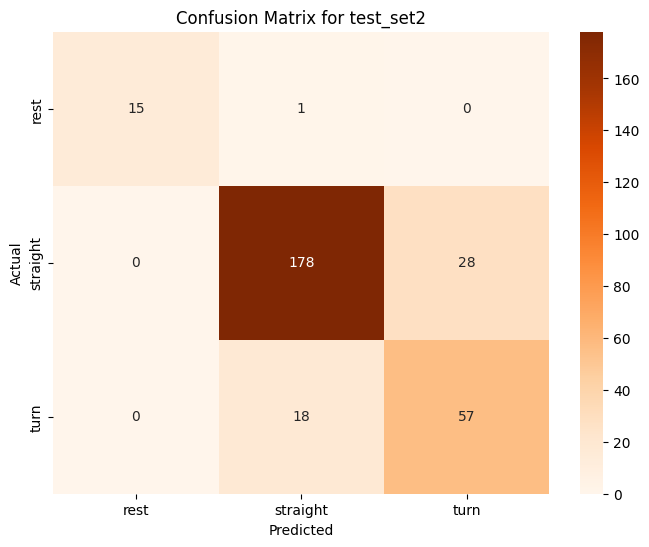

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [31]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.predict(X2)

# Computing the confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=grid.classes_, 
            yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Printing the classification report
print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The model's performance on the two testing sets is slightly lower than its performance on the training/validation set. This suggests a slight overfitting, but the model still generalizes reasonably well to unseen data.
2. Comparing both sections, the model in section 2 (using selected features) seems to be a better fit overall. It shows a more balanced performance across the training/validation and testing sets, suggesting less overfitting. However, a more detailed analysis, including feature importance and potential overfitting in both models, is needed to make a definitive conclusion.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1. The features selected were to provide a comprehensive repreentation of the motion dynamics without being redundant. The sum features (ax_sum, gx_sum, etc.) are representative of motion intensity and linear and rotataional dimensions, which makes these extremely relevant for this process. Variance features (ax_var, gx_var, etc.) measure the spread of motion data. These values are important for differentiating activities like walking or turning. Min and max features are useful for deecting transitions or significant changes in motion, which is important to measure. The sum features of a and g provide insight into the overall motion state which helps us reflect on more in-depth data and generalizations.

In [32]:
# TODO - Load group selected features from cv_set to X
selected_features = [
    'ax_sum', 'ay_sum', 'az_sum', 
    'gx_sum', 'gy_sum', 'gz_sum',
    'a_sum', 'g_sum',
    'ax_var', 'ay_var', 'az_var',
    'gx_var', 'gy_var', 'gz_var',
    'ax_min', 'ay_min', 'az_min', 
    'ax_max', 'ay_max', 'az_max',
    'gx_min', 'gy_min', 'gz_min',
    'gx_max', 'gy_max', 'gz_max'
]
X = cv_set[selected_features]
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,az_min,ax_max,ay_max,az_max,gx_min,gy_min,gz_min,gx_max,gy_max,gz_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023869,0.001496,0.000544,0.024992,-0.000178,-0.00007,-0.000082,0.000110,0.000075,0.000078
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024146,0.001865,0.000615,0.024828,-0.000141,-0.00008,-0.000090,0.000124,0.000098,0.000090


In [33]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [34]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define parameter grid
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Perform grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [35]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))
# Print the results from the grid search
print("Best parameter set:\n{}\n".format(grid.best_params_))

# Best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))

# Best cross-validation test score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Test set accuracy score
test_set_accuracy = grid.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_set_accuracy))

Best parameter set:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test set accuracy: 0.97


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

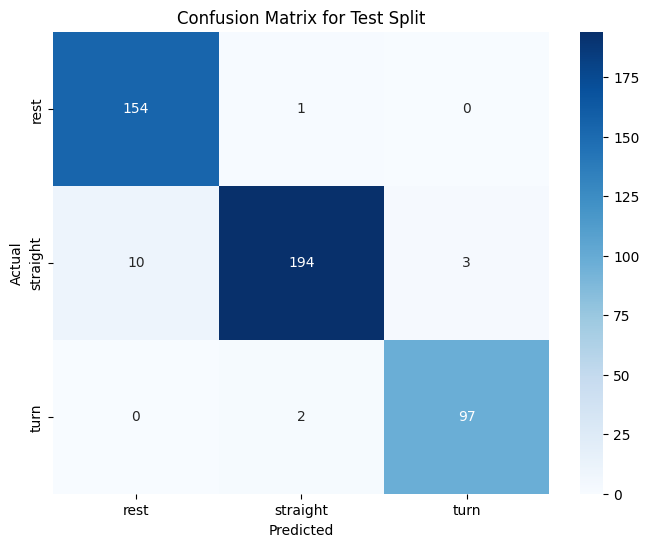

Classification Report for Test Split:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.97       155
    straight       0.98      0.94      0.96       207
        turn       0.97      0.98      0.97        99

    accuracy                           0.97       461
   macro avg       0.96      0.97      0.97       461
weighted avg       0.97      0.97      0.97       461



In [36]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predicting on the test split
y_pred = grid.predict(X_test)

# Computing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Split')
plt.show()

# Printing the classification report
print("Classification Report for Test Split:\n")
print(classification_report(y_test, y_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [37]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,az_min,ax_max,ay_max,az_max,gx_min,gy_min,gz_min,gx_max,gy_max,gz_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024026,0.002506,0.000845,0.024884,-0.000168,-0.000065,-0.000102,0.000155,0.000078,0.000069
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024030,0.002427,0.000949,0.024881,-0.000148,-0.000076,-0.000094,0.000201,0.000095,0.000076


In [38]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,az_min,ax_max,ay_max,az_max,gx_min,gy_min,gz_min,gx_max,gy_max,gz_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048347,0.002575,0.002993,0.049701,-0.000115,-0.000095,-0.000122,0.000094,0.000115,0.000080
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047687,0.003880,0.004106,0.050477,-0.000128,-0.000132,-0.000098,0.000140,0.000140,0.000083


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [39]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
# Print test set accuracy scores
test_set1_score = grid.score(X1, y1)
test_set2_score = grid.score(X2, y2)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.93
test_set2 score: 0.45


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

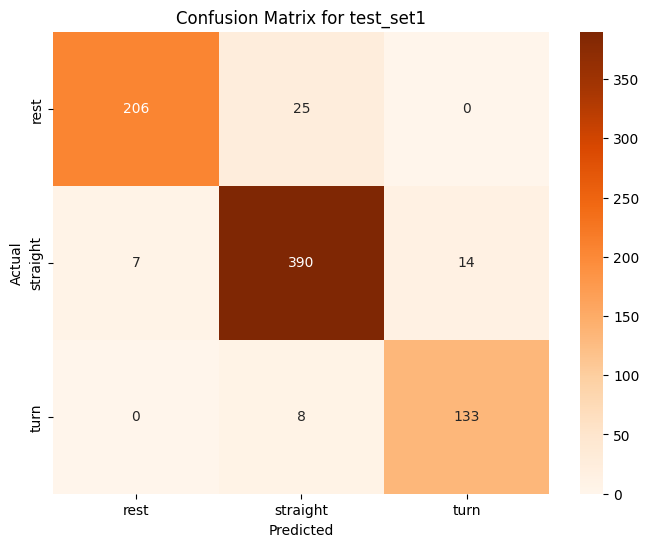

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.97      0.89      0.93       231
    straight       0.92      0.95      0.94       411
        turn       0.90      0.94      0.92       141

    accuracy                           0.93       783
   macro avg       0.93      0.93      0.93       783
weighted avg       0.93      0.93      0.93       783



In [40]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# Display confusion matrix and classification report for test_set1
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for test_set1')
plt.show()

print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

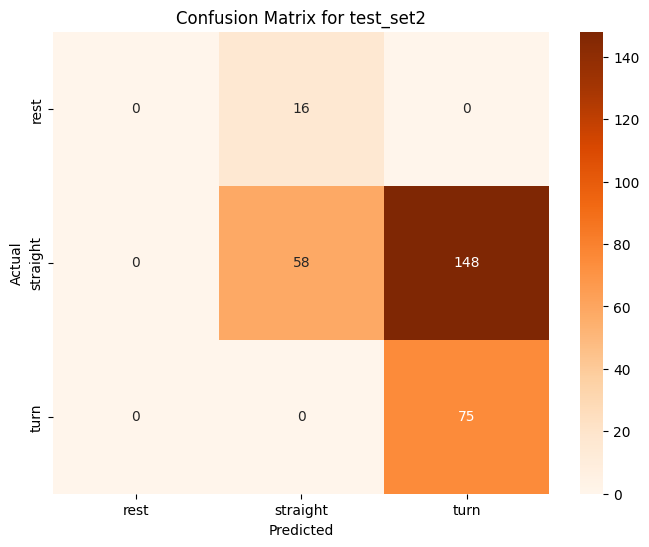

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.78      0.28      0.41       206
        turn       0.34      1.00      0.50        75

    accuracy                           0.45       297
   macro avg       0.37      0.43      0.31       297
weighted avg       0.63      0.45      0.41       297



c:\Users\Saba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [41]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Display confusion matrix and classification report for test_set2
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for test_set2')
plt.show()

print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*. 

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.1 Section 3 outperforms section 1 on test datasets. The section 1 performance metrics are as follows: Test set accuracy: 96%, test_set1 accuracy: 92%, test_set2 accuracy: 25%. The section 3 performance is: Test set accuracy 97%, test_set1 accuracy: 93%, test_set2 accuracy: 45%. Section outperforms section 1 in test_set1 accuracy, and test_set2 accuracy and falls just short of section 1 cross-validation accuracy. Section 3 outperforms Section 1 on test datasets due to better generalization. Section 1 suffers from overfitting caused by irrelevant and redundant features. The selection of relevant features in section 3 may explain this performance improvement compared to section 1.

1.2 Section 3 also outperforms section 2. Section 2 Performance: Test set accuracy: 83%, test_set1 accuracy: 92%, test_set2 accuracy: 25%. Section 3 performance: Test set accuracy: 97%, test_set1 accuracy: 93%, test_set2 accuracy: 45%. Section 2's model uses fewer features, avoiding overfitting and showing better generalization than Section 1. However, its limited feature set (e.g., no min/max features) misses some motion dynamics captured in Section 3, such as transitions or variability in movement. This leads to slightly lower test accuracies than Section 3.

2.Section 1 includes all features, leading to overfitting. Section 2 avoids overfitting by using fewer features but sacrifices some key motion dynamics, resulting in lower test accuracies. Section 3 strikes a balance by using a diverse yet targeted feature set, including sum, variance, and min/max features, which improves test accuracies. High dimensionality in Section 1 increases the risk of overfitting, especially with redundant features. Section 3’s reduced dimensionality helps the model focus on meaningful patterns.Section 3's inclusion of diverse feature types (e.g., sum for intensity, variance for variability, min/max for transitions) improves generalization across datasets. Section 2 lacks this diversity, leading to slightly poorer test performance.


____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [42]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [43]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [44]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [45]:
# Perform any missing imports

from sklearn.decomposition import PCA
# TODO - Initiate the pipeline 
# (1 marks)
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [46]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],  # PCA hyperparameter tuning
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # SVC regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],  # SVC kernel coefficient
    'classifier__kernel': ['rbf']  # Kernel type
}

In [47]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [48]:
# TODO: Print the results from the grid search

print("Best parameters:\n", grid.best_params_)
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))

Best parameters:
 {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 14}
Best cross-validation train score: 0.97
Best cross-validation validation score: 0.93
Test set accuracy: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

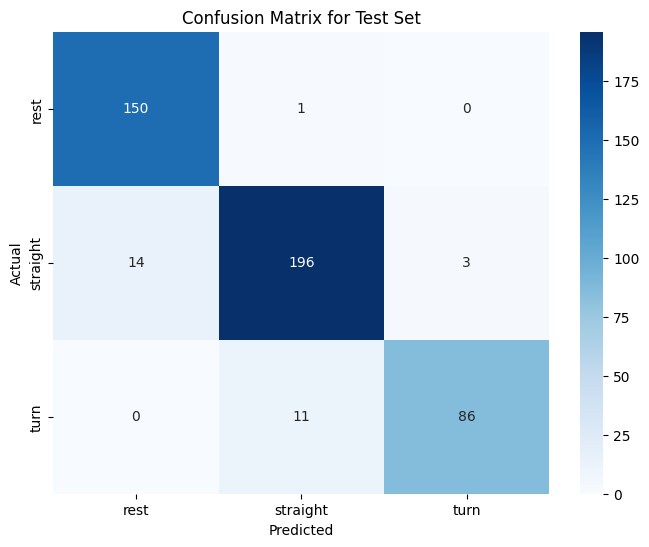

Classification Report:

              precision    recall  f1-score   support

        rest       0.91      0.99      0.95       151
    straight       0.94      0.92      0.93       213
        turn       0.97      0.89      0.92        97

    accuracy                           0.94       461
   macro avg       0.94      0.93      0.94       461
weighted avg       0.94      0.94      0.94       461



In [49]:
# TODO - Display confusion matrix and print classification report

y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [50]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state']) 
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [51]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state']) 
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [52]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("Test Set 1 Accuracy: {:.2f}".format(grid.score(X1, y1)))
print("Test Set 2 Accuracy: {:.2f}".format(grid.score(X2, y2)))

Test Set 1 Accuracy: 0.91
Test Set 2 Accuracy: 0.58


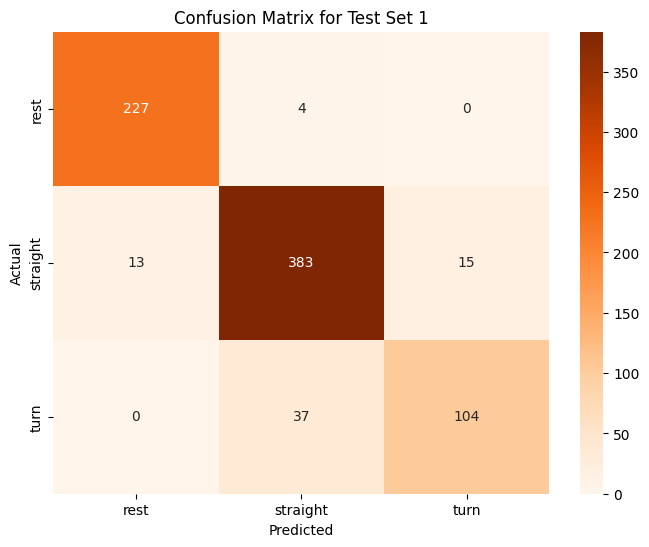

Classification Report for Test Set 1:

              precision    recall  f1-score   support

        rest       0.95      0.98      0.96       231
    straight       0.90      0.93      0.92       411
        turn       0.87      0.74      0.80       141

    accuracy                           0.91       783
   macro avg       0.91      0.88      0.89       783
weighted avg       0.91      0.91      0.91       783



In [53]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Oranges',
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

print("Classification Report for Test Set 1:\n")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

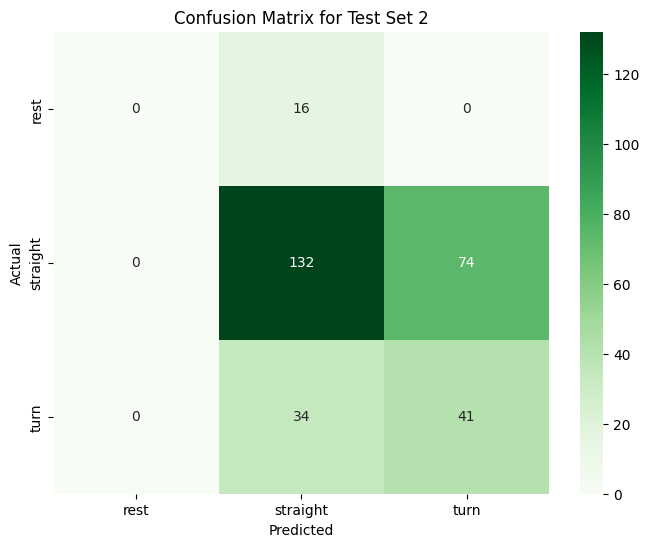

Classification Report for Test Set 2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.73      0.64      0.68       206
        turn       0.36      0.55      0.43        75

    accuracy                           0.58       297
   macro avg       0.36      0.40      0.37       297
weighted avg       0.59      0.58      0.58       297



c:\Users\Saba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [54]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens',
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

print("Classification Report for Test Set 2:\n")
print(classification_report(y2, y2_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*. 
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
1. 
The PCA model outperforms the model trained with all features in section 1 on Test Set 2, suggesting that PCA reduces noise and redundancy, leading to better generalization. However, it performs similarly or slightly worse than models using selected features (Section 2) and group-selected features (Section 3) on Test Set 1. This indicates that while PCA can capture key patterns, manual or group feature selection might retain more relevant features for specific datasets. The difference in performance on Test Set 2 highlights PCA's ability to handle noisy or unfamiliar data better than feature selection methods. The results suggest that PCA is effective in reducing dimensionality but may struggle in scenarios where specific feature selection provides a better fit to the data.
 
2. 
The differences in performance between the model trained in Section 1 (using all features) and the model in Section 4 (using PCA) can be explained by the fact that PCA reduces the dimensionality by transforming the original features into principal components, which may capture more generalized patterns and reduce overfitting. PCA might also lose domain specific features and fail to retain relevant information.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer** 
1.The model selected is Random Forest because it is robust, can handle both classification and regression tasks effectively, and is less prone to overfitting due to its ensemble nature. Random forests can handle multiclass classification and provide insights into feature importance.

In [55]:
# TODO - Load group selected features from cv_set to X
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']
X = cv_set[selected_features]
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943


In [56]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state'] 

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [57]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
# Perform any missing imports
from sklearn.ensemble import RandomForestClassifier
# TODO - Initiate the pipeline 
# (1 mark)
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest as the classifier
])


In [59]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'classifier__n_estimators': [50, 100, 150],    # Number of trees
    'classifier__max_depth': [None, 10, 20],       # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5],       # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2]         # Minimum samples required at a leaf node
}

# Print the parameter grid to verify
print(param_grid)

{'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20], 'classifier__min_samples_split': [2, 5], 'classifier__min_samples_leaf': [1, 2]}


In [60]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [61]:
# TODO: Print the results from the grid search
from sklearn.metrics import accuracy_score

print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Train Score: {grid.cv_results_['mean_train_score'][grid.best_index_]:.2f}")
print(f"Best Cross-Validation Validation Score: {grid.best_score_:.2f}")

#test score
y_pred = grid.best_estimator_.predict(X_test) 
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {test_accuracy:.2f}")


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Cross-Validation Train Score: 1.00
Best Cross-Validation Validation Score: 0.98
Test Set Accuracy: 0.98


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

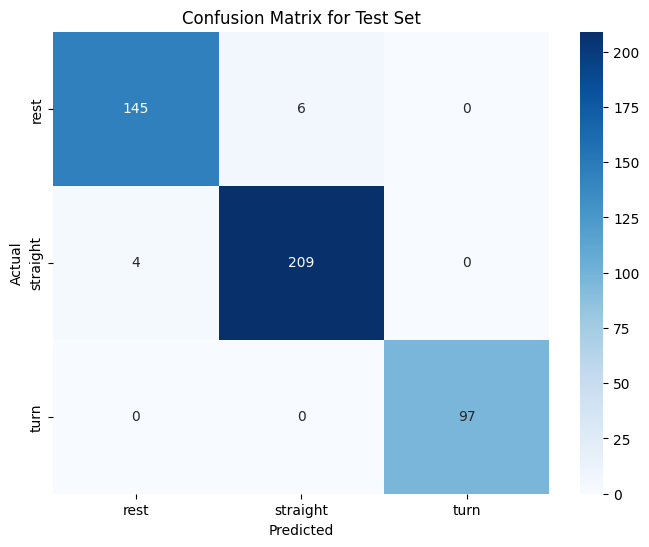

Classification Report:
               precision    recall  f1-score   support

        rest       0.97      0.96      0.97       151
    straight       0.97      0.98      0.98       213
        turn       1.00      1.00      1.00        97

    accuracy                           0.98       461
   macro avg       0.98      0.98      0.98       461
weighted avg       0.98      0.98      0.98       461



In [62]:
# TODO - Display confusion matrix and print classification report

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

#classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [63]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999


In [64]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [65]:
# TODO - Print test score accuracies for test_set1 and test_set2

# test_set1 accuracy
y1_pred = grid.best_estimator_.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)
print(f"Test Set 1 Score: {test_set1_score:.2f}")

# test_set2 accuracy 
y2_pred = grid.best_estimator_.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)
print(f"Test Set 2 Score: {test_set2_score:.2f}")

Test Set 1 Score: 0.98
Test Set 2 Score: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

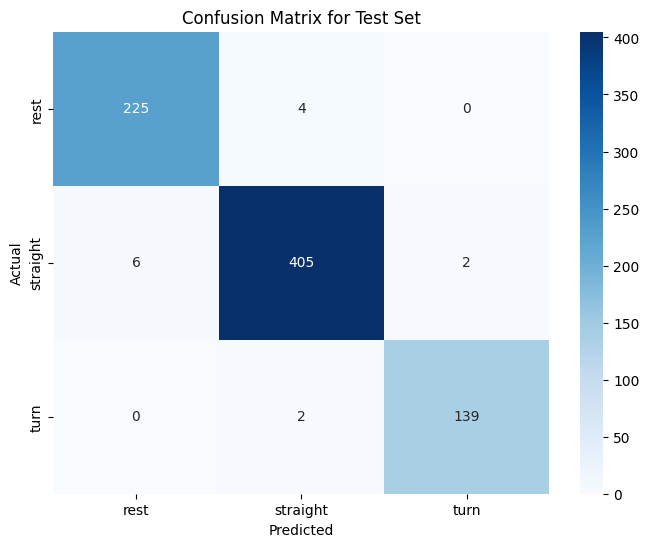

Classification Report:
               precision    recall  f1-score   support

        rest       0.98      0.97      0.98       231
    straight       0.98      0.99      0.98       411
        turn       0.99      0.99      0.99       141

    accuracy                           0.98       783
   macro avg       0.98      0.98      0.98       783
weighted avg       0.98      0.98      0.98       783



In [66]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
conf_matrix = confusion_matrix(y1_pred, y1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

#classification report
print("Classification Report:\n", classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

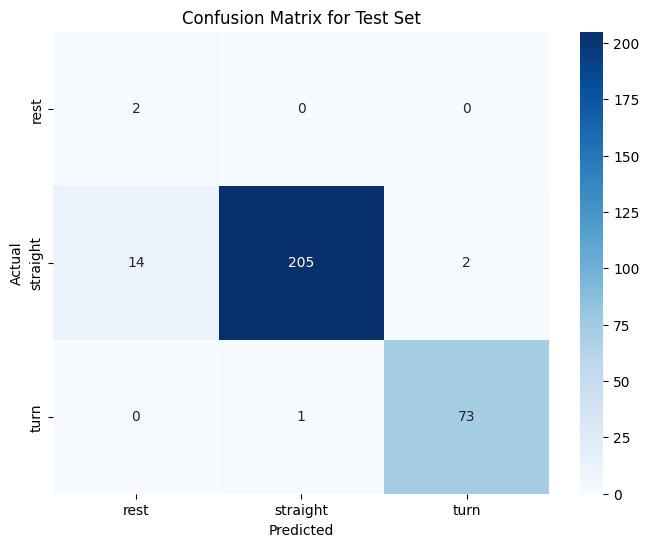

Classification Report:
               precision    recall  f1-score   support

        rest       1.00      0.12      0.22        16
    straight       0.93      1.00      0.96       206
        turn       0.99      0.97      0.98        75

    accuracy                           0.94       297
   macro avg       0.97      0.70      0.72       297
weighted avg       0.95      0.94      0.93       297



In [67]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.best_estimator_.predict(X2)
conf_matrix = confusion_matrix(y2_pred, y2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

#classification report
print("Classification Report:\n", classification_report(y2, y2_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)


#### 5.2.3 - Answer  
Random Forest (RF) shows generally better performance across the training and test sets. RF achieves 98% accuracy and consistently high F1-scores in the training and test set 1, outperforming SVC, which achieves an accuracy of 83% in the training set and lower F1-scores, especially in the "turn" class. The RF model demonstrates robustness to class imbalances and is able to classify all classes effectively, including the turn class.

In test set 2, however, SVC outperforms RF slightly with an accuracy of 84% and a macro average F1-score of 0.85, whereas RF's performance drops to 94% accuracy with a much lower F1-score for the "rest" class (due to precision being 1.00 but recall dropping to 0.12). This discrepancy could be due to RF's overfitting the rest classleading to poor generalization when new data from test set 2 is encountered.
SVC, on the other hand, appears to generalize better in test set 2 by achieving more balanced performance across all classes, particularly for the "straight" and "turn" classes. This indicates that SVC might be better at handling the subtle separations between classes in this set.

Overall, Random Forest fits better on the training data and test set 1 due to its robustness and ability to handle complex relationships, but SVC performs slightly better on test set 2, likely due to its better generalization to unseen data.

____